## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [1]:
# Imports needed to complete this exam
import pandas as pd

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [3]:
#q1 (1)
df=pd.read_csv('alumni.csv')

### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [4]:
#a) (1)
df.head(5)

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [5]:
#b) (1)
df.tail(5)

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [10]:
#c) (1)
df.dtypes


Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [8]:
#d) (1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.8+ KB


In [11]:
#e) (1)
df.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [35]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")


 

66000.0

In [61]:
#a) (2)
alumni=pd.read_csv('alumni.csv')
alumni_new_savings=alumni['Savings ($)']
alumni['Savings']=alumni_new_savings.apply(lambda x: f"{clean_currency(x)}")
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [116]:
#b) (1)
alumni.dtypes

dtype('float64')

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [50]:
# a) (1)
alumni["Gender"].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [268]:
# b) (1)
alumni
alumni['Gender'].replace('M','Male',inplace=True)
alumni["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

In [171]:
# c) (1)
alumni['Gender']= alumni['Gender'].apply(replace)

d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [273]:
# d) (1)
alumni=pd.read_csv('alumni.csv', index_col='Gender')
rows=alumni.loc[['Male','Female']]
rows
alumni.loc[['Male','Female']]

,Year Graduated,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
Gender,,,,,,,
Male,2004,Single,Standard Diploma,Yes,125000,10869,"$86,000"
Male,2005,Married,College Prep Diploma,No,100000,10869,"$116,000"
Male,2007,Married,Standard Diploma,No,120000,10869,"$76,000"
Male,2006,Divorced,Standard Diploma,No,160000,11724,"$120,000"
Male,2007,Married,Standard Diploma,No,75000,11724,"$86,000"
...,...,...,...,...,...,...,...
Female,2006,Married,Standard Diploma,No,65000,11335,"$46,000"
Female,2008,Married,Standard Diploma,No,110000,11335,"$50,000"
Female,2009,Divorced,Standard Diploma,Yes,75000,11335,"$19,000"


e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [269]:
# e) (1)
alumni["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [71]:
# a)(1)
alumni['Salary'].median()

75000.0

In [70]:
# b)(1)
alumni['Salary'].mean()

84090.90909090909

In [73]:
# c)(1)
alumni['Salary'].std()

21234.128008173615

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [271]:
# d) (1)
alumni=pd.read_csv('alumni.csv')
alumni['Fee']>15000

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Name: Fee, Length: 88, dtype: bool

Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

<AxesSubplot:xlabel='Diploma Type'>

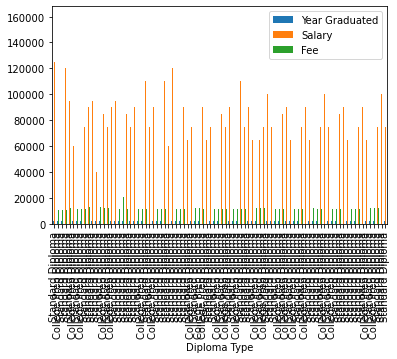

In [249]:
#a) (1)
import matplotlib.pyplot as plt
alumni=pd.read_csv('alumni.csv')
alumni.plot.bar('Diploma Type')


b) Now create a box plot comparison between 'Savings' and 'Salary' columns

<AxesSubplot:>

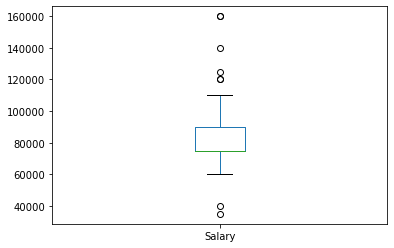

In [95]:
#b) (1)
alumni.plot.box(x='Savings',y='Salary')

c) Generate a histogram with the 'Salary' column and use 12 bins.

<AxesSubplot:ylabel='Frequency'>

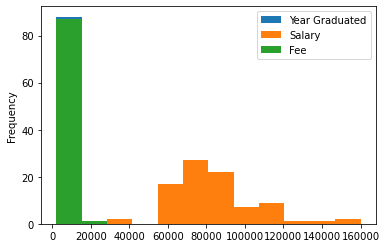

In [98]:
#c) (1)
alumni.plot.hist('Salary', bins=12)

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

KeyError: 'Savings'

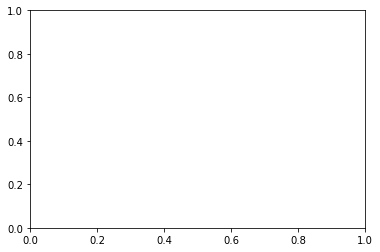

In [272]:
#d) (1)
alumni.plot.scatter(x='Salary',y='Savings')

# Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [109]:
# Q7 (2)
data_crosstab=pd.crosstab(alumni['Marital Status'], alumni['Defaulted'])
data_crosstab

Defaulted,No,Yes
Marital Status,,
Divorced,8,11
Married,19,16
Single,9,25
